In [19]:
using JLD, PyPlot, Statistics

In [17]:
push!(LOAD_PATH, "../Preprocesamiento/")

4-element Array{String,1}:
 "@"                   
 "@v#.#"               
 "@stdlib"             
 "../Preprocesamiento/"

In [33]:
using PreprocTools, ArraySetTools

In [3]:
arxname="/home/karel/JLDFiles/4AP/DatosLFP4APusadosPaper.jld"
arx=load(arxname)

Dict{String,Any} with 4 entries:
  "notacsd"        => "la dCSD fue obtenida directamente, sin planchar gaussian…
  "CSDALindenberg" => Float32[6.71387 5.70679 … 66.1316 -14.4348; -25.8484 -36.…
  "LFP"            => [0.0 2.01416 … 12.085 -8.05664; -8.05664 -10.0708 … 8.056…
  "kCSDCorrecta"   => [0.0 -0.095717 … -0.535431 -0.684494; 0.060564 -0.111223 …

In [5]:
freq=7.022 #KHz
lfp=arx["LFP"]
csd=arx["kCSDCorrecta"];
nmax=size(lfp)[3]

1402

In [10]:
ejemplo=lfp[33,34,:];
trango=(1:nmax)./freq;

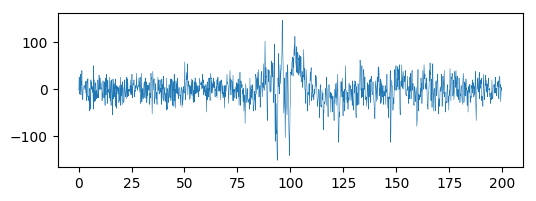

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1b93d08cf8>

In [16]:
figure(figsize=(6,2))
plot(trango, ejemplo, lw=0.4)

In [22]:
lfpstdd=zeros(64,64)
for j=1:64, k=1:64
    lfpstdd[j,k]=std(lfp[j,k,:])
end

In [29]:
lfpstdwin=zeros(64,64)
for j=1:64, k=1:64
    lfpstdwin[j,k]=sum(desviacionventanas(lfp[j,k,:], 49, 7.022))
end

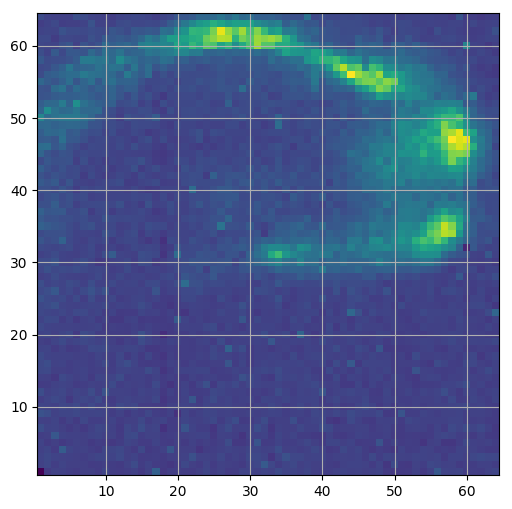

In [30]:
figure(figsize=(6,6))
imshow(lfpstdwin, origin="lower", extent=[0.5,64.5, 0.5,64.5])
grid()

In [35]:
ruidosos=BuscaRuidosos(lfp, 0.1,199, 7.022)
picos=buscaCanalPicos(lfp, 0.1, 199, 7.022)

ruidgraf=elemtorow(ruidosos)
picgraf=elemtorow(picos);

Estoy buscando del cuadro 1 al , 1398


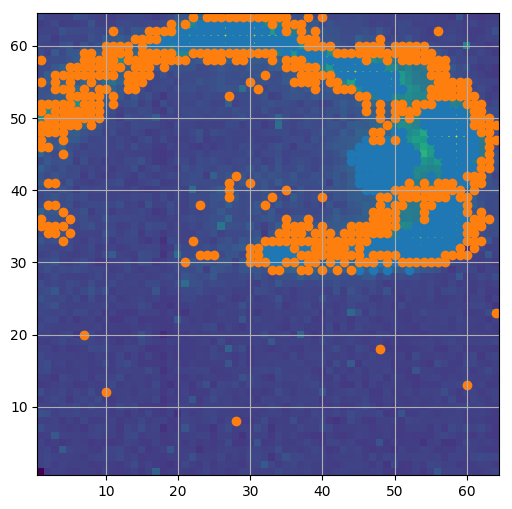

PyObject <matplotlib.collections.PathCollection object at 0x7f1b9b394e80>

In [40]:
figure(figsize=(6,6))
imshow(lfpstdwin, origin="lower", extent=[0.5,64.5, 0.5,64.5])

grid(which="both")
scatter(ruidgraf[:,2], ruidgraf[:,1])
scatter(picgraf[:,2], picgraf[:,1])


In [43]:
ejemplos=[31 34; 32 50; 34 56; 44 58;  50 54; 55 44; 61 32; 61 24]
labels=["a", "b", "c", "d", "e", "f", "g", "h"]

8-element Array{String,1}:
 "a"
 "b"
 "c"
 "d"
 "e"
 "f"
 "g"
 "h"

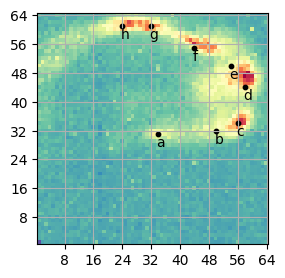

In [82]:
figure(figsize=(3,3))
imshow(lfpstdd, origin="lower", extent=[0.5,64.5, 0.5,64.5], cmap="Spectral_r")
xticks(collect(8:8:64))
yticks(collect(8:8:64))
grid()
scatter(ejemplos[:,2], ejemplos[:,1], color="black", s=10)
for j=1:8
    annotate(labels[j], xy=(ejemplos[j,2]-0.5, ejemplos[j,1]-3.5), color="black")
end

savefig("MapaElectrodosSelectos4AP.svg", dpi=90)

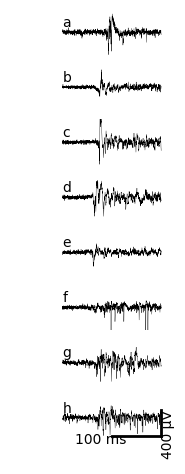

In [83]:

tiempo=1:nmax
t=700

farofa, lista=subplots(8, sharex=true, sharey=true, figsize=(1.4,8*0.7))

for j=1:8
    xlim(trango[1]-10, trango[end]+10)
    ylim(-400,400)
    (reng, colu)=(ejemplos[j,1],ejemplos[j,2])
    lista[j].axis("off")
    lista[j].plot(trango,vec(lfp[reng,colu,:]),
    linewidth=0.25, color="black")
    lista[j].annotate(labels[j],xy=(0,100), annotation_clip=false, fontsize=10)
end

lista[8].plot([100,200],[-330,-330], lw=2, c="k")
lista[8].annotate("100 ms", xy=(26,-450), fontsize=10, annotation_clip=false)

lista[8].plot([200,200],[-330,130], lw=2, c="k")
lista[8].annotate("400 µV", xy=(200,-50), fontsize=10,annotation_clip=false, rotation=90)

savefig("TrazosSelectos4AP.svg",dpi=90)